In [2]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [3]:
df_8145 = pd.read_csv("data/rfc8145-addresses.csv", sep='\t',skiprows=[1], dtype={'ASN':str} )
df_8145.head(10)

,ASN,Count seen in last 28 days,Address,Also saw both TAs,Spamhaus PBL status
0,3,6,18.72.0.3,False,False
1,3,1,170.245.240.3,False,False
2,12,18,128.122.253.46,True,False
3,12,15,128.122.253.24,True,False
4,31,17,131.215.139.100,True,False
5,31,14,131.215.254.100,True,False
6,42,25,74.63.24.243,True,False
7,42,23,2620:171:f8:f0::7,True,False
8,42,23,2620:171:f8:f0::3,True,False
9,42,23,2620:171:f8:f0::4,True,False


In [73]:
df_delegated = pd.read_csv("data/delegated-extended.csv", sep='|', dtype={'allocdate':str, 'value':str} )
df_delegated_asn_af = df_delegated.loc[(df_delegated.rir=='afrinic') & (df_delegated.type=='asn')]
df_delegated_asn_eu = df_delegated.loc[(df_delegated.rir=='ripencc') & (df_delegated.type=='asn')]
df_delegated_asn_us = df_delegated.loc[(df_delegated.rir=='arin') & (df_delegated.type=='asn')]
df_delegated_asn_la = df_delegated.loc[(df_delegated.rir=='lacnic') & (df_delegated.type=='asn')]
df_delegated_asn_ap = df_delegated.loc[(df_delegated.rir=='apnic') & (df_delegated.type=='asn')]




,rir,cc,type,value,prefixlength,allocdate,status,opaqueid,e-stats
697,afrinic,ZA,asn,1228,1,19910301,assigned,F36B9F4B,e-stats
698,afrinic,ZA,asn,1229,1,19910301,assigned,F36B9F4B,e-stats
699,afrinic,ZA,asn,1230,1,19910301,assigned,F36B9F4B,e-stats
700,afrinic,ZA,asn,1231,1,19910301,assigned,F36B9F4B,e-stats
701,afrinic,ZA,asn,1232,1,19910301,assigned,F36B9F4B,e-stats
1341,afrinic,ZA,asn,2018,1,20010307,assigned,F36B9F4B,e-stats
1834,afrinic,EG,asn,2561,1,20070920,assigned,F3648BE1,e-stats
2133,afrinic,ZA,asn,2905,1,19930910,assigned,F367678F,e-stats
2194,afrinic,ZA,asn,3067,1,19931029,assigned,F367BC5B,e-stats
2195,afrinic,ZA,asn,3068,1,19931029,assigned,F367BC5B,e-stats


In [41]:
df_delegated_af = pd.read_csv("data/delegated-afrinic-extended-latest.csv", sep='|', dtype={'allocdate':str, 'value':str} )
df_delegated_asn = df_delegated_af.loc[df_delegated_af.type=='asn']




In [42]:
df_8145_af = df_8145.merge(df_delegated_af[df_delegated_af.type=='asn'], 
              left_on="ASN", right_on="value", how='inner')[['ASN',
                                                             'Count seen in last 28 days',
                                                             'Address',
                                                             'Also saw both TAs',
                                                             'Spamhaus PBL status',
                                                             'cc',
                                                             'allocdate']]

df_8145_af_v6 = df_8145_af[df_8145_af.Address.str.contains(":")]

In [ ]:
df_8145_af.loc[df_8145_af['Count seen in last 28 days'] > 10]

## Number of ASN found by country

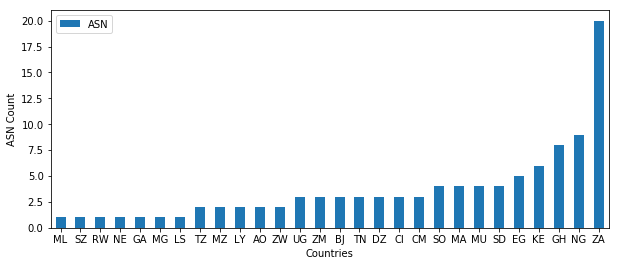

In [7]:
df_8145_by_cc = pd.DataFrame(df_8145_af.groupby(['cc'])['Count seen in last 28 days'].nunique())

df_8145_by_cc = df_8145_by_cc.sort_values('ASN')

ax = df_8145_by_cc.plot.bar(figsize=(10,4), rot=0)
ax.set_xlabel('Countries')
ax.set_ylabel('ASN Count')
plt.show()

## Number of resolvers per country

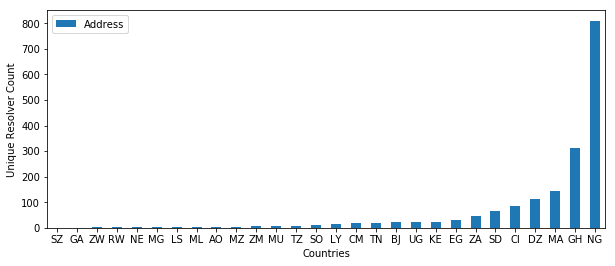

In [23]:
df_8145_by_ip_cc = pd.DataFrame(df_8145_af.groupby('cc', as_index=False)['Address'].count())
df_8145_by_ip_cc = df_8145_by_ip_cc.sort_values('Address')

ax = df_8145_by_ip_cc.plot.bar(x='cc',figsize=(10,4), rot=0)
ax.set_xlabel('Countries')
ax.set_ylabel('Unique Resolver Count')
plt.show()

## Median value of resolver seen over the last 28 days

In [ ]:
df_8145_seen = pd.DataFrame(df_8145_af.groupby(['ASN'])['Count seen in last 28 days'].median())
df_8145_seen = df_8145_seen.sort_values('Count seen in last 28 days')
df_8145_seen = df_8145_seen.loc[df_8145_seen['Count seen in last 28 days'] > 9]




# ax = df_8145_seen.plot.bar(x='ASN',figsize=(10,4), rot=45)
# ax.set_xlabel('ASN')
# ax.set_ylabel('Median Count seen in last 28 days')
# plt.show()

/Users/amreesh/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


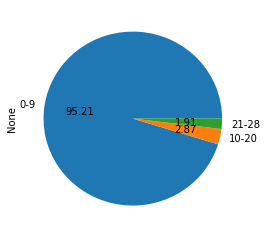

In [69]:
df_8145_seen28 = df_8145_af.iloc[:,[2,1]]
df_8145_seen28['bins'] = pd.cut(df_8145_seen28['Count seen in last 28 days'],bins=[0,9,20,28], labels=["0-9","10-20","21-28"])
df_8145_seen28 = df_8145_seen28.groupby('bins').size()

df_8145_seen28.plot.pie(figsize=(4,4), autopct='%.2f')

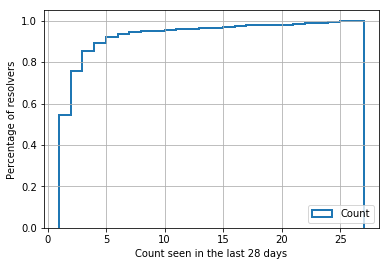

In [39]:
n_bins = 500

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
fig, ax1 = plt.subplots(figsize=(6, 4))

labels = ['Count']

linestyles = ['solid']
#plot the cumulative histogram
n, bins, patches = ax1.hist([df_8145_af['Count seen in last 28 days']], 
                           n_bins, density=1, histtype='step', linewidth=2, 
                            #range=[0,10],
                           cumulative=True, label=labels)
                                    
# tidy up the figure
ax1.grid(True)
ax1.legend(loc='lower right')
#ax1.set_title('Web URL')
ax1.set_xlabel('Count seen in the last 28 days')
ax1.set_ylabel('Percentage of resolvers')

plt.show()

## APNIC DNSSEC data

In [75]:
df_dnssec = pd.read_csv("data/asn_dnssec_apnic_10082018_2.csv", sep=',', dtype={'asn':str, 'dnssec_validates':float, 'uses_google_pdns':float, 'samples':int}, keep_default_na=False)
df_dnssec = df_dnssec.loc[df_dnssec['dnssec_validates'] > 0]

In [94]:
df_8145_dnssec = df_8145_af.merge(df_dnssec, 
              left_on="ASN", right_on="asn", how='inner')[['ASN',
                                                          'cc_dnssec',
                                                           'name',
                                                           'dnssec_validates',
                                                           'uses_google_pdns',
                                                           'samples'
                                                          ]]
df_8145_dnssec = df_8145_dnssec.drop_duplicates()

In [95]:
df_8145_dnssec.sort_values(by=['dnssec_validates', 'samples'], ascending=False)

,ASN,cc_dnssec,name,dnssec_validates,uses_google_pdns,samples
1427,37136,BJ,ETISALAT-AS,0.9736,0.3254,13970
95,15399,KE,WANANCHI-,0.9526,0.1874,40089
1692,37662,YT,WIOCC-AS,0.9443,0.9873,395
203,29614,GH,GHANATEL-AS,0.9363,0.8763,204719
1691,37662,SO,WIOCC-AS,0.9294,0.9948,3666
1659,37473,SO,TELESOM,0.9268,0.7014,37174
77,10474,ZA,OPTINET,0.9195,0.1123,14283
1422,37100,UG,SEACOM-AS,0.8940,0.9666,689
1,5713,KE,SAIX-NET,0.8561,0.9394,132
0,5713,ZA,SAIX-NET,0.8527,0.2364,8747


In [78]:
df_8145_af.head(10)

,ASN,Count seen in last 28 days,Address,Also saw both TAs,Spamhaus PBL status,cc,allocdate
0,5713,8,41.145.231.244,True,True,ZA,19950906
1,5713,1,41.147.143.162,False,True,ZA,19950906
2,6713,8,62.251.229.72,True,False,MA,20070920
3,6713,4,2001:4288:1800:362::3,False,False,MA,20070920
4,6713,3,160.161.217.192,False,True,MA,20070920
5,6713,2,160.77.112.10,False,False,MA,20070920
6,6713,2,105.151.224.62,False,True,MA,20070920
7,6713,2,160.171.163.157,False,True,MA,20070920
8,6713,2,154.145.35.1,False,True,MA,20070920
9,6713,2,196.80.92.180,False,True,MA,20070920
